In [1]:
import matplotlib.pyplot as plt 
import vnstock
import pandas as pd 
import numpy as np 
import datetime as dt
import math

In [2]:
min_weight_per_stock = 0.03
initial_NAV = 10**9

text = 'HPG,MWG,FPT,GVR,GMD,VCI,ACB,MBB,KDH,SZC,HCM,SSI,REE,PVD,DBC,HAH,MSN,TCB,NKG,ANV'
tickers = text.split(',')
start_date = '2022-01-01'
end_date = '2024-09-30'

df = vnstock.stock_historical_data(symbol=tickers[0], start_date=start_date, end_date=end_date, decor=True, beautify=True, source='TCBS', resolution='1D', type='stock')[['Close']]
df.rename(columns={'Close': tickers[0]}, inplace=True)
print(f"{tickers[0]}: done")

for i in range(1,len(tickers)):
    df_temp = vnstock.stock_historical_data(symbol=tickers[i], start_date=start_date, end_date=end_date, decor=True, beautify=True, source='TCBS', resolution='1D', type='stock')[['Close']]
    df_temp.rename(columns={'Close': tickers[i]}, inplace=True)
    df = df.join(df_temp)
    print(f"{tickers[i]}: done")

display(df.head())

Time range is 1003 days. Looping through 3 requests
HPG: done
Time range is 1003 days. Looping through 3 requests
MWG: done
Time range is 1003 days. Looping through 3 requests
FPT: done
Time range is 1003 days. Looping through 3 requests
GVR: done
Time range is 1003 days. Looping through 3 requests
GMD: done
Time range is 1003 days. Looping through 3 requests
VCI: done
Time range is 1003 days. Looping through 3 requests
ACB: done
Time range is 1003 days. Looping through 3 requests
MBB: done
Time range is 1003 days. Looping through 3 requests
KDH: done
Time range is 1003 days. Looping through 3 requests
SZC: done
Time range is 1003 days. Looping through 3 requests
HCM: done
Time range is 1003 days. Looping through 3 requests
SSI: done
Time range is 1003 days. Looping through 3 requests
REE: done
Time range is 1003 days. Looping through 3 requests
PVD: done
Time range is 1003 days. Looping through 3 requests
DBC: done
Time range is 1003 days. Looping through 3 requests
HAH: done
Time ran

,HPG,MWG,FPT,GVR,GMD,VCI,ACB,MBB,KDH,SZC,HCM,SSI,REE,PVD,DBC,HAH,MSN,TCB,NKG,ANV
Time,,,,,,,,,,,,,,,,,,,,
2022-01-04,32159,67270,55620,35650,37190,41670,19310,20120,40870,46160,29310,35960,44130,23560,30320,27830,140630,24680,31090,15680
2022-01-05,32200,66920,55680,36400,37340,41220,18920,19850,41850,47410,29280,35830,44760,23520,30520,27670,133180,24490,31010,16480
2022-01-06,31720,67120,55620,36600,36720,40600,18940,19600,42680,47480,28770,35220,44070,23480,30360,27260,127230,24200,29760,16280
2022-01-07,31510,66140,55560,36500,37780,40380,18690,19780,42530,46820,28670,35010,43690,23900,30640,28280,127390,23980,29520,16230
2022-01-10,31410,64920,54720,35740,36480,38080,18520,19430,40650,46490,27780,33620,42940,22270,29330,27460,126560,23590,29280,15380


In [3]:
riskfree_rates = 0
returns = df.pct_change().dropna()
returns_mean = returns.mean()
returns_cov = returns.cov()
def efficient_portfolio(df):
    rand_weight = np.random.random(len(df.columns))
    weight = rand_weight/np.sum(rand_weight)
    portfolio_returns = np.dot(returns_mean,weight)*252
    portfolio_std = (np.dot(np.dot(returns_cov*252,weight),weight))**(1/2)
    portfolio_sharpe = (portfolio_returns - riskfree_rates)/portfolio_std

    return portfolio_returns, portfolio_std, weight, portfolio_sharpe

In [4]:
case_portfolio_returns = []
case_portfolio_std = []
case_weight = []
case_sharpe = []

for _ in range(50000):
    portfolio_returns, portfolio_std, weight, portfolio_sharpe = efficient_portfolio(df)
    case_portfolio_returns.append(portfolio_returns)
    case_portfolio_std.append(portfolio_std)
    case_weight.append(weight)
    case_sharpe.append(portfolio_sharpe)

case_portfolio_returns = np.array(case_portfolio_returns)
case_portfolio_std = np.array(case_portfolio_std)
case_weight = np.array(case_weight)
case_sharpe = np.array(case_sharpe)

# Find the best sharpe
best_sharpe = np.argmax(case_sharpe)

# Find the best portfolio
print('Best weight:', case_weight[best_sharpe])

# Find the best portfolio returns
print('Best returns:', case_portfolio_returns[best_sharpe])

# Find the best portfolio std
print('Best std:', case_portfolio_std[best_sharpe])

# Find the best portfolio sharpe
print('Best sharpe:', case_sharpe[best_sharpe])

Best weight: [0.05552336 0.00307381 0.12965704 0.00904727 0.07856392 0.00092579
 0.05869198 0.12039813 0.02263224 0.02796039 0.01328818 0.02072012
 0.09089558 0.04139088 0.0386406  0.08349496 0.00560059 0.03725023
 0.08575119 0.07649374]
Best returns: 5.283164088980427e-05
Best std: 0.0049792486436124744
Best sharpe: 0.010610364067192797


Text(0, 0.5, 'Port returns')

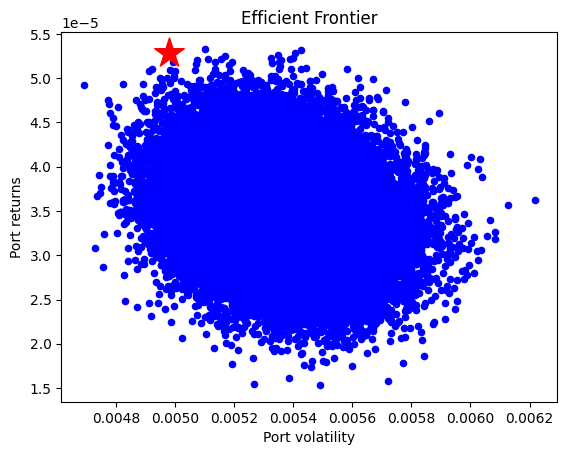

In [5]:
plt.scatter(case_portfolio_std, case_portfolio_returns, color = 'blue', s= 20)
plt.scatter(case_portfolio_std[best_sharpe], case_portfolio_returns[best_sharpe], color = 'red', marker='*', s = 500 )
# for i in range(len(returns.columns)):
#     plt.scatter(returns.std().iloc[i]*np.sqrt(252), returns.mean().iloc[i]*252, color = 'red')
plt.title("Efficient Frontier")
plt.xlabel('Port volatility')
plt.ylabel('Port returns')

In [6]:
port_optimum_weight = case_weight[best_sharpe]*(1-len(tickers)*min_weight_per_stock) + min_weight_per_stock

frame = pd.DataFrame({'Ticker':returns.columns, 'Weight':port_optimum_weight})
frame['Value'] = frame['Weight']*initial_NAV
frame['Shares'] = (frame['Value'].values / df.iloc[-1].values)
frame['Shares'] = frame['Shares'].apply(lambda x: math.floor(x/100)*100)
frame = frame.sort_values(by = 'Weight', ascending=False)
print('Final Portfolio')
display(frame)

Final Portfolio


,Ticker,Weight,Value,Shares
2,FPT,0.081863,8.186282e+07,600
7,MBB,0.078159,7.815925e+07,3000
12,REE,0.066358,6.635823e+07,900
18,NKG,0.064300,6.430048e+07,2900
15,HAH,0.063398,6.339798e+07,1500
4,GMD,0.061426,6.142557e+07,900
19,ANV,0.060597,6.059750e+07,3600
6,ACB,0.053477,5.347679e+07,2000
0,HPG,0.052209,5.220935e+07,1900
13,PVD,0.046556,4.655635e+07,1600


In [7]:
frame.to_csv("HighShaprePortfolio.csv")